# Clustering #

In [5]:
%store -r columns_encoded
%store -r columns
%store -r data
%store -r data_encoded

columns_encoded = columns_encoded
columns = columns
data = data
data_encoded = data_encoded

## Vorbereitung des Datensets für Clustering-Algorithmen

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

- Erstellen eines Datensets mit ausschließlich numerischen Features, um Rechenoperationen bei Cluster-Algorithmen zu ermöglichen
- Die ausgegebenen Features wurden hierfür entfernt...

In [7]:
# Create a copy of data (with only numerical values)
data_numerical = data.copy().select_dtypes(include='number')
set(data.columns) - set(data_numerical.columns)

{'Bitte gib hier ein Pseudonym ein und merke dir dieses\n(z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene "Datenpunkt" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.',
 'Geschlecht',
 'Was ist dein Lieblingsessen? (nur eines angeben)',
 'Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)',
 'Was ist deine absolute Lieblingssportart?',
 'Welchem Studiengang fühlst du dich am meisten zugehörig?',
 'Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?'}

Die folgenden Features sind nach der ersten Filterung noch enthalten...

In [8]:
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 56 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype
---  ------                                                                                                                      --------------  -----
 0   Alter                                                                                                                       62 non-null     int64
 1   Als wie sportlich würdest du dich einschätzen?                                                                              62 non-null     int64
 2   Welche Rolle spielt für dich gesunde Ernährung?                                                                             62 non-null     int64
 3   Wie gerne gehst du Essen oder Trinken?                                                                                      62 non-null  

### Skalieren der Daten

Da fast alle Fragen einen Zahlenraum von 1-5 vorgegeben hatten, müsste hierfür eigentlich keine Skalierung durchgeführt werden. Trotzdem skalieren wir die Daten, insb. aus den folgenden Gründen:

- Einzelne Features wie z. B. "Alter" machen eine Skalierung notwendig, da Clustering-Algorithmen sonst verschiedene Zahlenräume vergleichen würde
- Wenn in Zukunft weitere/andere Features (z. B. mit Zahlenraum von 1-10) eingeführt werden, sind die dargestellten Ansätze trotzdem langfristig nutzbar

In [9]:
# WIP: Filter out features that seem to be not relevant for clustering
cols_remove = [
            #     'AcceptedCmp3', 'AcceptedCmp4',
            #    'AcceptedCmp5', 'AcceptedCmp1',
            #    'AcceptedCmp2', 'Complain', 'Response'
               ]
data_numerical = data_numerical.drop(cols_remove, axis=1)

# Scaling
scaler = StandardScaler()
scaler.fit(data_numerical)
data_numerical_scaled = pd.DataFrame(scaler.transform(data_numerical),
                           columns= data_numerical.columns )

data_numerical_scaled.head()

,Alter,Als wie sportlich würdest du dich einschätzen?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,Wie sehr interessierst du dich für Musik?,Wie gerne liest Du?,"Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?","Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?",...,sportarten_Leichtathletik,sportarten_Reiten,sportarten_Rennrad/Mountainbike,sportarten_Schwimmen,sportarten_Tanzen,sportarten_Tennis,sportarten_Volleyball,sportarten_Wassersport,sportarten_Wintersport,sportarten_Yoga
0,0.555073,0.728893,0.552967,-0.871197,0.181800,0.153296,1.071517,0.727409,0.314127,-0.827253,...,-0.356753,-0.182574,1.941451,-0.74162,-0.564933,-0.3849,-0.614636,-0.262613,-0.296174,1.941451
1,0.105210,-0.298183,0.552967,0.147939,1.206488,-0.710737,0.000000,-0.912567,0.314127,0.287740,...,-0.356753,-0.182574,1.941451,-0.74162,-0.564933,-0.3849,1.626978,-0.262613,-0.296174,1.941451
2,-0.344653,-1.325259,1.777393,0.147939,0.181800,0.153296,1.071517,-0.912567,0.314127,0.287740,...,-0.356753,-0.182574,-0.515079,-0.74162,1.770122,-0.3849,-0.614636,-0.262613,-0.296174,1.941451
3,-0.569585,1.755968,-1.895886,0.147939,0.181800,-0.710737,-1.071517,-0.092579,-0.532650,0.287740,...,2.803060,-0.182574,-0.515079,-0.74162,-0.564933,-0.3849,-0.614636,-0.262613,3.376389,-0.515079
4,-0.344653,-0.298183,0.552967,-0.871197,-1.867577,-1.574770,-1.071517,0.727409,-0.532650,1.402733,...,-0.356753,-0.182574,-0.515079,-0.74162,-0.564933,-0.3849,-0.614636,-0.262613,-0.296174,-0.515079


## k-Means Clustering

TODO: Kurzbeschreibung von Funktionsweise

### 1. Methode: Elbow-Method

- Anzahl der Cluster muss bei k-Means explizit gewählt werden
- Für die Wahl der Clusteranzahl gibt es keine feste Metrik, sondern nur Heuristiken zur Annäherung an einen geeigneten Wert
- Nutzen von "Elbow-Method" zum finden einer geeigneten Clusteranzahl

- scitkit stellt einen eigenen Visualizer zum Berechnen/Darstellen der Methode bereit
    - Übergabe des zu nutzenden Models (hier KMeans)
    - Übergabe der zu testenden Clustergrößen (hier 2-10, 2-20 & 2-30, um allg. Überblick zu bekommen)

c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

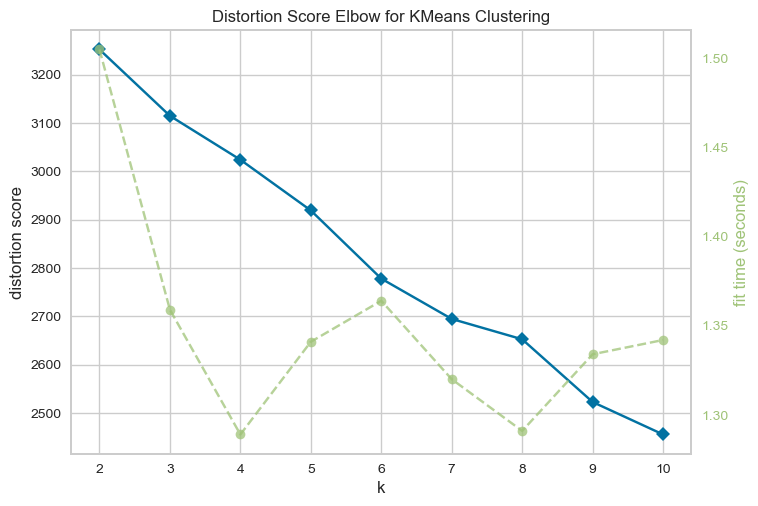

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# !pip install yellowbrick
# %pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(data_numerical_scaled)
visualizer.show()

c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

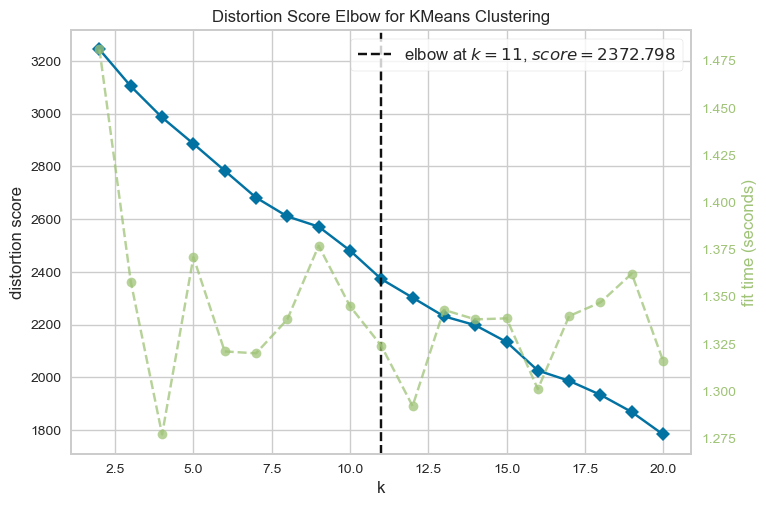

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# !pip install yellowbrick
# %pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=20)

visualizer.fit(data_numerical_scaled)
visualizer.show()

c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

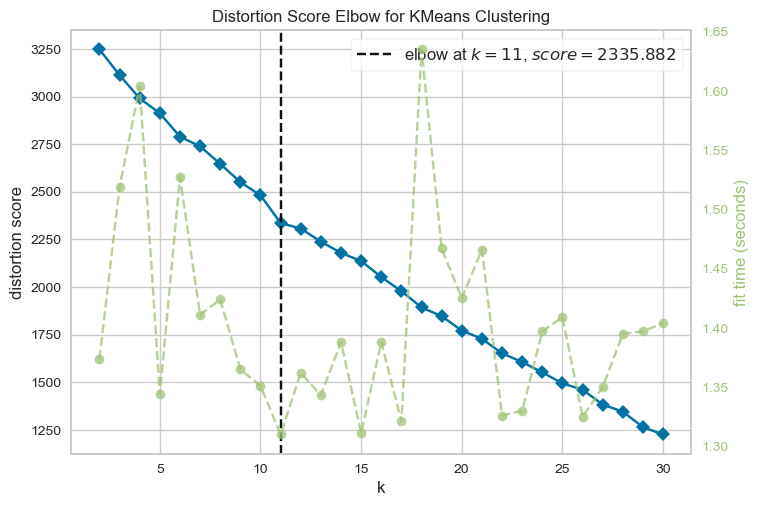

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# !pip install yellowbrick
# %pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=30)

visualizer.fit(data_numerical_scaled)
visualizer.show()

__Erkenntnisse__

- Der distortion score (d. h. der Durchschnitt der quadrierten Abstände von jedem Punkt zu seinem zugewiesenen Clusterzentrum) nimmt bzgl. der Clusteranzahl k tendenziell linear ab, wodurch kein eindeutiger "Elbow" zu erkennen ist  
    -> Cluster scheinen nicht sehr eindeutig trennbar zu sein  

- Optimale Anzahl von Clustern mit 9-11 (je nach Messung) vergleichsweise hoch  
    -> Gefundene Clusterkriterien scheinen recht "kleinteilig" zu sein

### 2. Methode: Manuelles Clusterstellung (TODO: ggf. nach Themengebieten trennen, um bessere Cluster zu finden?)

- Testen verschiedener Parameterwerte für k-Means Algorithmus
- Verschachtelte for-Schleife an sich ineffizient für Berechnung, aber aufgrund der vergleichsweise geringen Laufzeit & Komplexität von k-Means noch vertretbar
    - Verschiedene Anzahl von Clustern ausprobieren, da vorab nicht bekannt ist, wie viele Cluster am Ende eine "sinnvolle" Einteilung beschreiben
    - Verschiedene Random-States für jede Clusteranzahl ausprobieren, um zufällige Präferenzen für eine Clusteranzahl zu vermeiden

In [10]:
# TODO: Parameter tuning!

cluster_params_n_clusters = [3, 4, 6, 8, 10]
cluster_params_random_state = [0, 5, 10]

kmeans_iterations = []

for param_cluster in cluster_params_n_clusters:
    for param_random_state in cluster_params_random_state:
        kmeans_iterations.append(KMeans(n_clusters=param_cluster, random_state=param_random_state, n_init='auto').fit(data_numerical_scaled))

c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

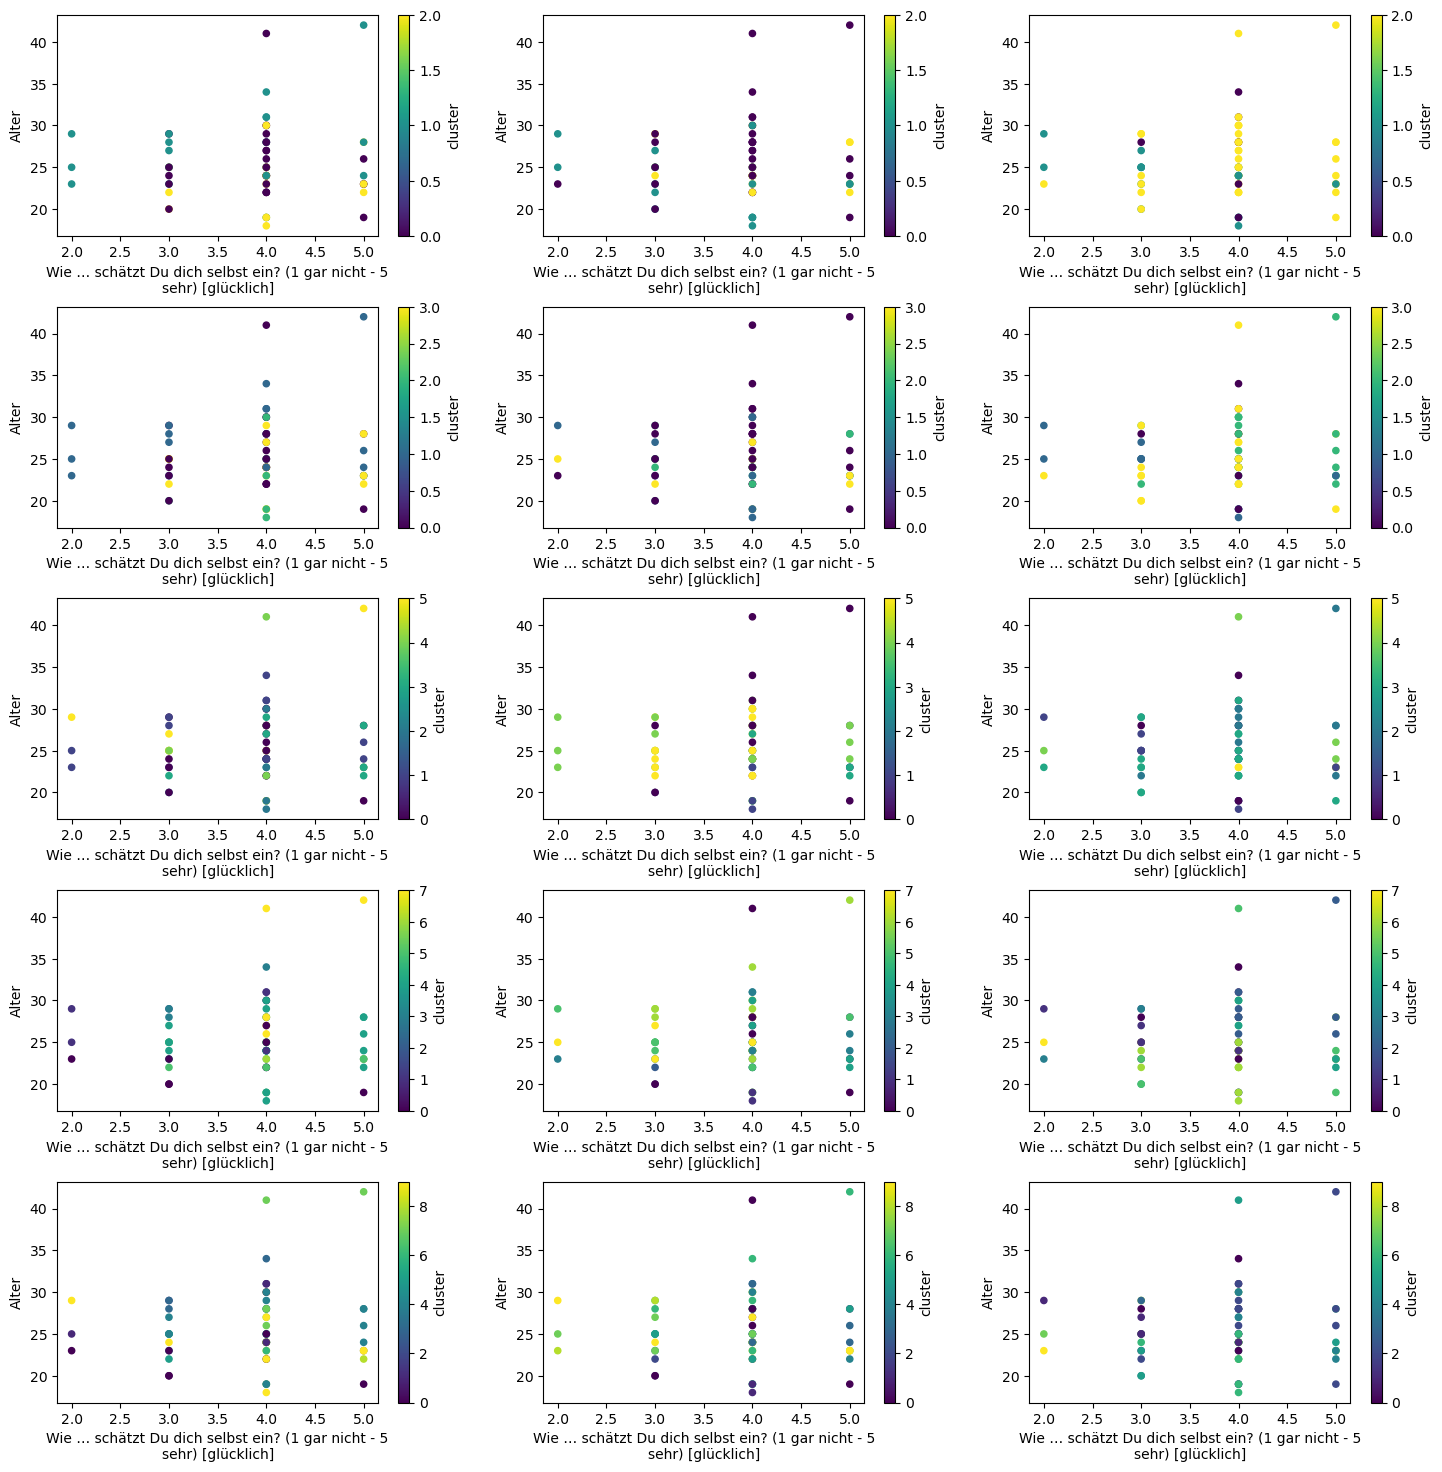

In [11]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
fig.tight_layout(pad=3)

figsize_rows = 5
figsize_columns = 3

figposition_row = 0
figposition_column = 0

for kmeans in kmeans_iterations:
    data["cluster"] = kmeans.labels_
    data.plot(kind="scatter", ax=axes[figposition_row%5, figposition_column%3], x=columns.gluecklich, y=columns.alter, c="cluster", cmap="viridis")
    figposition_column += 1
    if figposition_column % 3 == 0:
        figposition_row += 1

# TODO: Sinnvolle Plots finden und daraus Schlüsse ziehen #

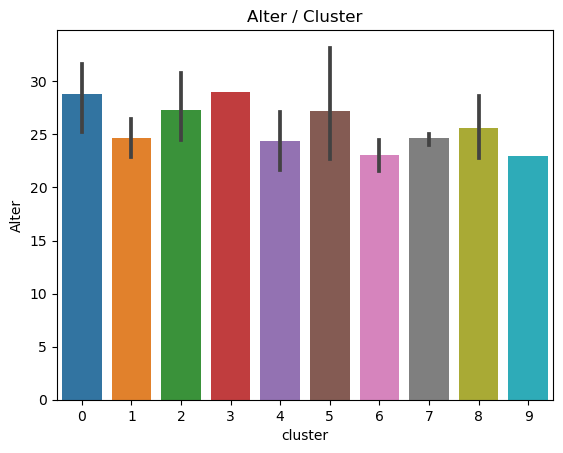

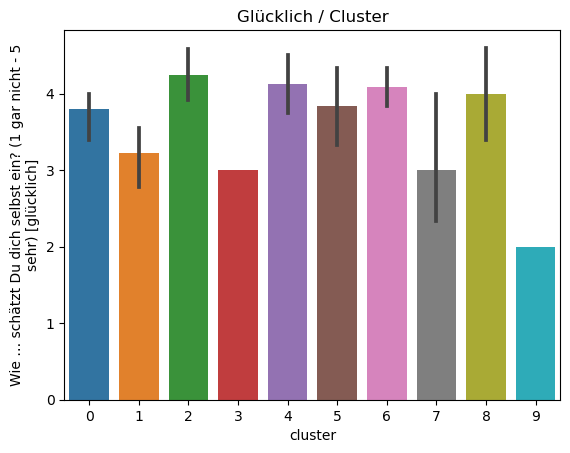

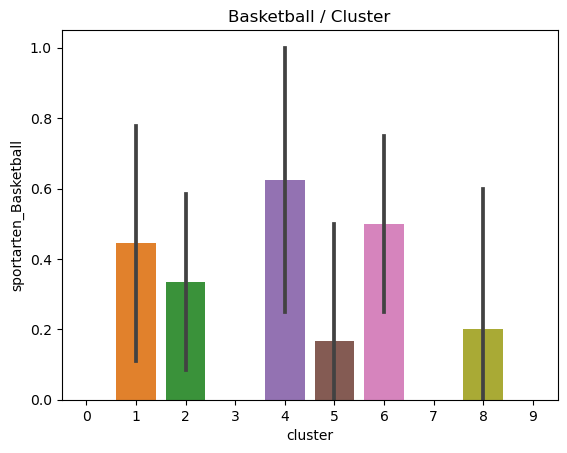

In [12]:
sb.barplot(x='cluster', y=columns.alter, data=data)
plt.title("Alter / Cluster")
plt.show()

sb.barplot(x='cluster', y=columns.gluecklich, data=data)
plt.title("Glücklich / Cluster")
plt.show()

sb.barplot(x='cluster', y=columns.sportarten_Basketball, data=data)
plt.title("Basketball / Cluster")
plt.show()

<Axes: xlabel='cluster', ylabel='Welche Rolle spielt für dich gesunde Ernährung? '>

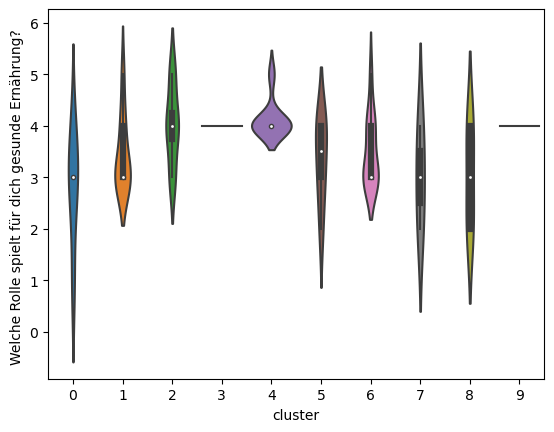

In [13]:
sb.violinplot(data=data, y=columns.ernaehrung, x="cluster")

## WIP: DBSCAN

TODO: Kurzbeschreibung von Funktionsweise

- Zu setzende Parameter: minPts (Maß für Erreichbarkeit eines Punktes) & epsilon (Nachbarschaftslänge)

minPts
- Empfehlung nach [Sander et al., 1998](https://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf) (für mehrdimensionale Daten): 2*Anzahl der Dimensionen
    - Problem: Daten haben sehr viele Features, aber vergleichsweise wenig Datenpunkte (Clusteranzahl würde Anzahl der Datenpunkte übersteigen)
    - Lösung (TODO): Features sinnvoll filtern?

epsilon
- Schema nach [Rahmah and Sitanggang, 2016](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf): Die durchschnittliche Distanz von jedem Datenpunkt zu seinen "n_neighbors" (entspricht gewählten minPts-Wert) berechnen
    - Ähnlich zur "Elbow-Method" kann dann am Graphen der Punkt abgelesen werden, ab dem ein kleinerer Wert keinen nennenswerten positiven Einfluss auf die Clusterbildung hat

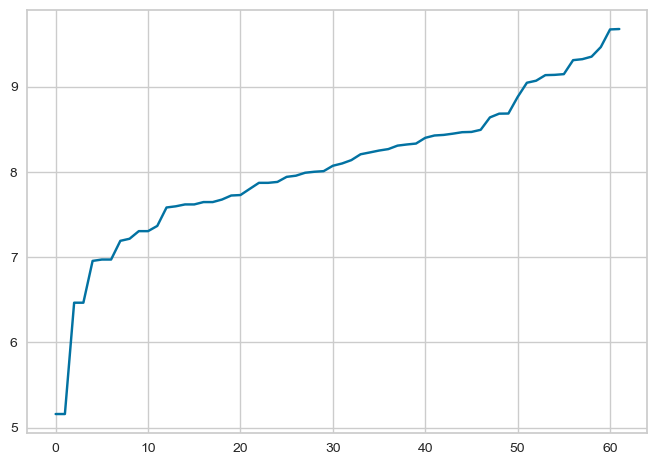

In [41]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

# based on https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
neighbors = NearestNeighbors(n_neighbors=40)
neighbors_fit = neighbors.fit(data_numerical_scaled)
distances, indices = neighbors_fit.kneighbors(data_numerical_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

<Axes: xlabel='Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [glücklich]', ylabel='Alter'>

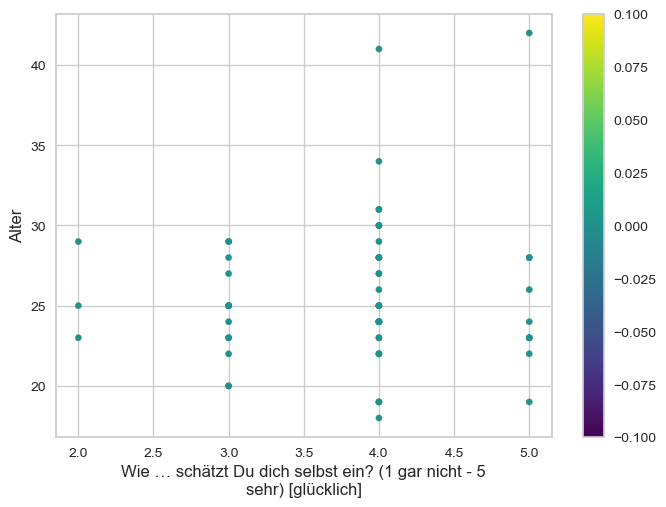

In [50]:
dbscan = DBSCAN(eps=200, min_samples=11)

dbscan.fit(data_numerical_scaled)

# Werte mit negativen Werte haben kein Cluster bzw. sind Noise-Punkte
dbscan.labels_

# Darstellung der Cluster
# fig, ax = plt.subplots(figsize=(7,7))
# plt.scatter(data_numerical_scaled[:,0], data_numerical_scaled[:,1], c=dbscan.labels_)
data.plot(kind="scatter", x=columns.gluecklich, y=columns.alter, c=dbscan.labels_, cmap="viridis")

## WIP: Gaussian Mixture Model

TODO: Kurzbeschreibung von Funktionsweise

c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

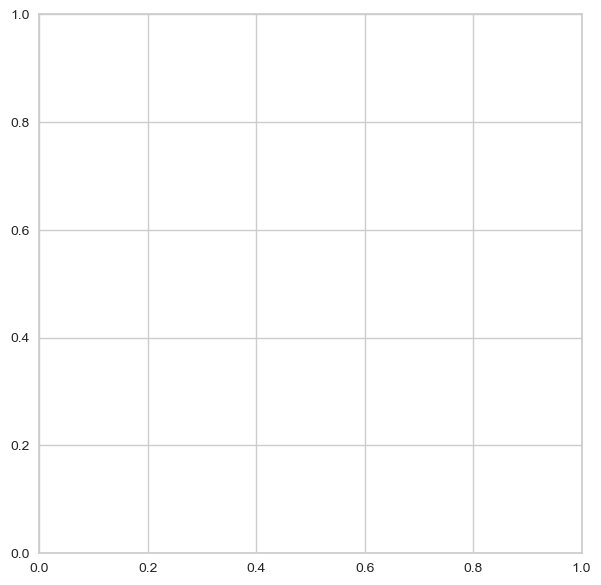

In [51]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4, random_state=0)

gm.fit(data_numerical_scaled)

# Cluster-Zentren
gm.means_

labels = gm.predict(data_numerical_scaled)
labels

# Darstellung der Cluster
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data_numerical_scaled[:,0], data_numerical_scaled[:,1], c=labels)

## WIP: Hierarchichal Clustering

TODO: Kurzbeschreibung von Funktionsweise

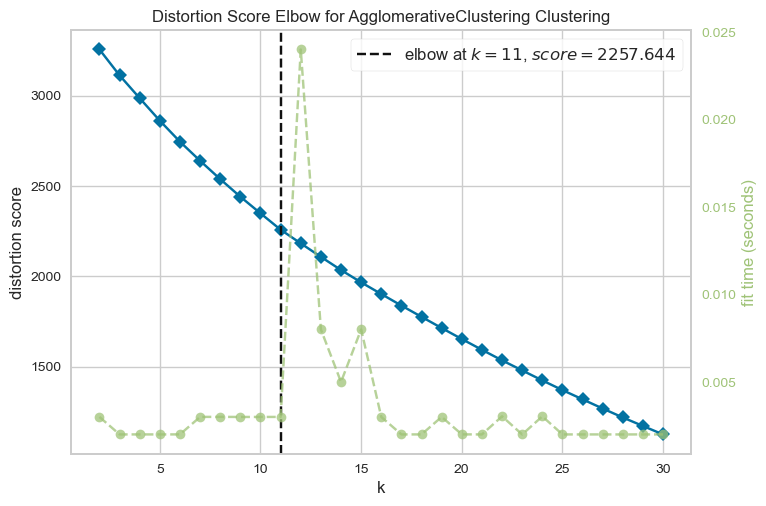

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=30)

visualizer.fit(data_numerical_scaled)
visualizer.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(linkage="ward",
                                n_clusters=None,
                                distance_threshold=10.0)

# Variante: Cluster statt threshold angeben
# ward = AgglomerativeClustering(linkage="ward",
#	                            n_clusters=5)

ward.fit(data)

# Cluster-Zentren
ward.labels_

# Darstellung der Cluster
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data[:,0], data[:,1], c=ward.labels_)